In [ ]:
pimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('dataset1.csv')

In [ ]:
data.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


In [ ]:
data.shape

(309, 16)

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.describe(include=object)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [ ]:
data.isna().sum().to_frame()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

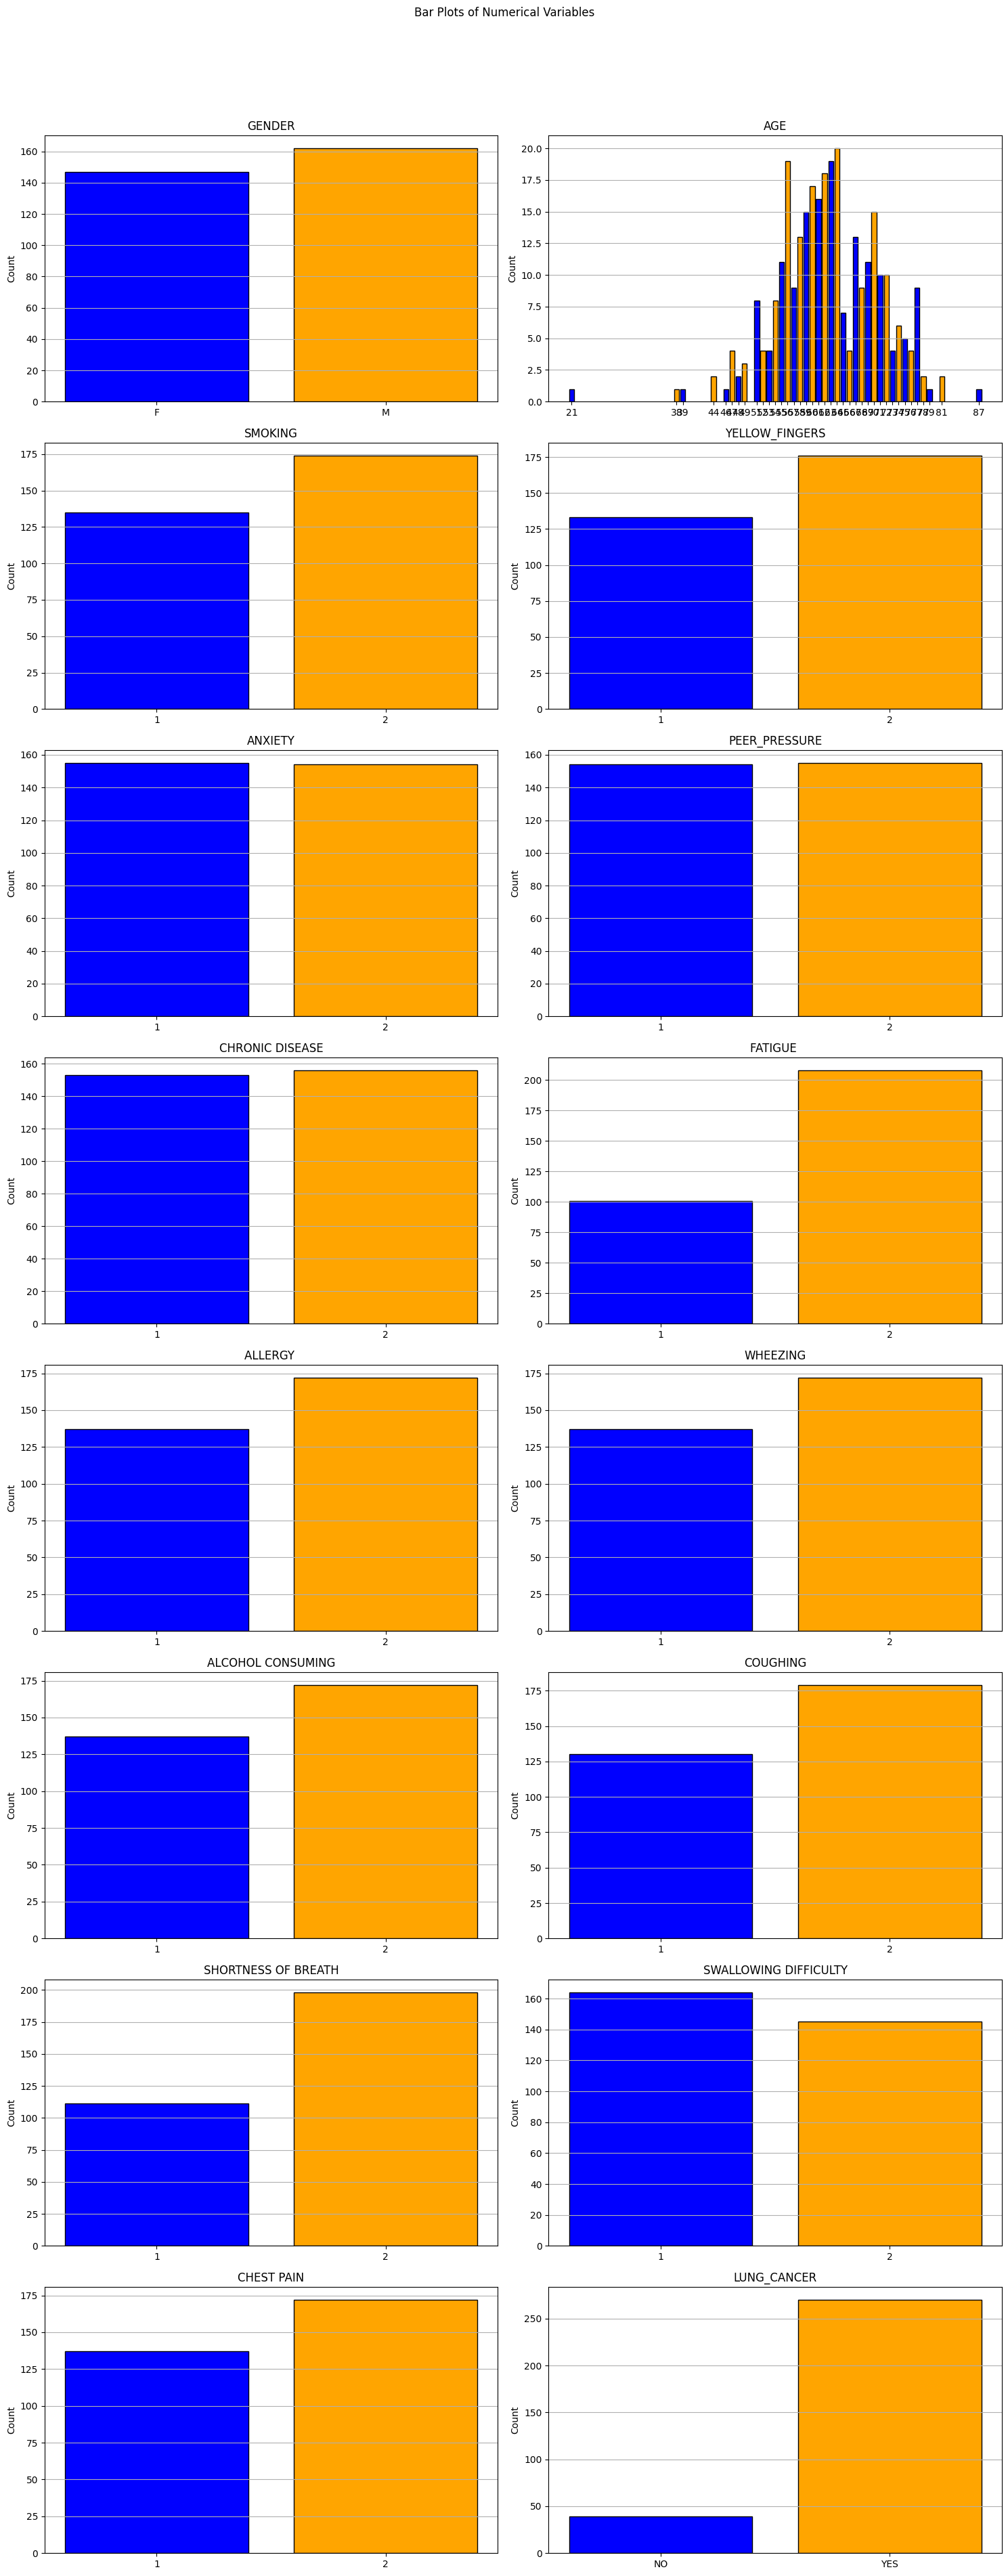

In [ ]:
df = pd.DataFrame(data)

# Determine the number of columns
num_columns = len(df.columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_columns + 1) // 2  # Ensure enough rows

# Plot bar plots for numerical variables
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Bar Plots of Numerical Variables')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each bar plot
for i, column in enumerate(df.columns):
    ax = axes[i]
    counts = df[column].value_counts().sort_index()
    ax.bar(counts.index, counts.values, color=['blue', 'orange'], edgecolor='black')
    ax.set_title(column)
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index)
    ax.set_ylabel('Count')
    ax.grid(True, axis='y')

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


In [ ]:
df['GENDER'].replace(['F','M'],[1,2],inplace=True)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


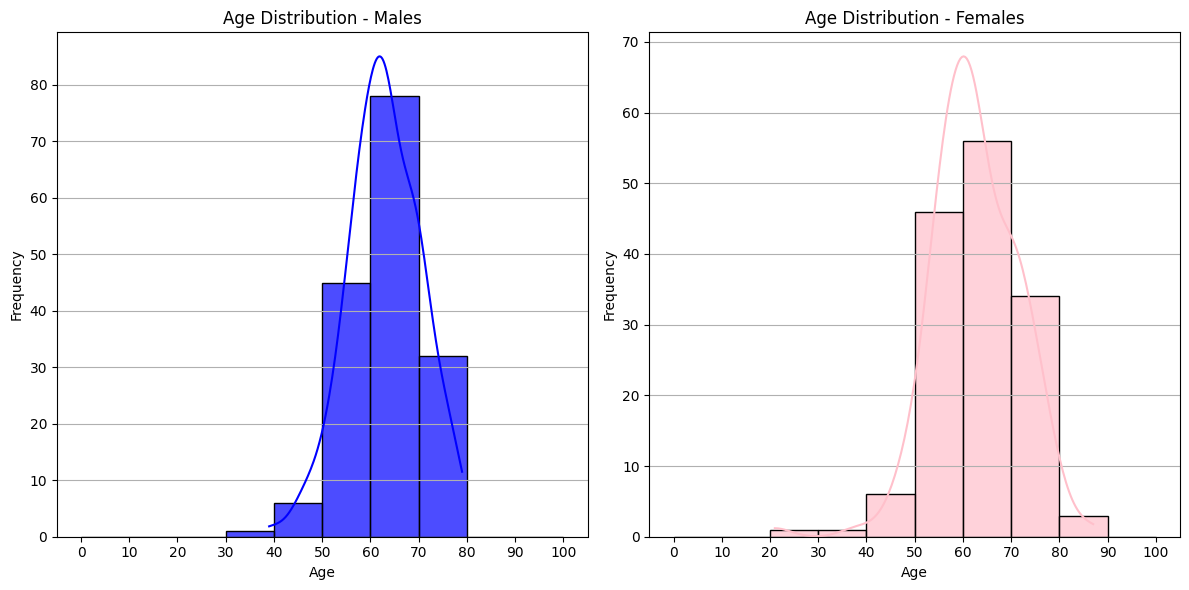

In [ ]:
# Map genders for clarity
# df['GENDER'] = df['GENDER'].map({1: 'Male', 2: 'Female'})

# Filter data by gender
males = df[df['GENDER'] == 2]
females = df[df['GENDER'] == 1]

# Plot age distribution for males and females
plt.figure(figsize=(12, 6))

# Male age distribution
plt.subplot(1, 2, 1)
sns.histplot(males['AGE'], bins=range(0, 101, 10), kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution - Males')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 10))
plt.grid(axis='y')

# Female age distribution
plt.subplot(1, 2, 2)
sns.histplot(females['AGE'], bins=range(0, 101, 10), kde=True, color='pink', edgecolor='black', alpha=0.7)
plt.title('Age Distribution - Females')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 10))
plt.grid(axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [ ]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


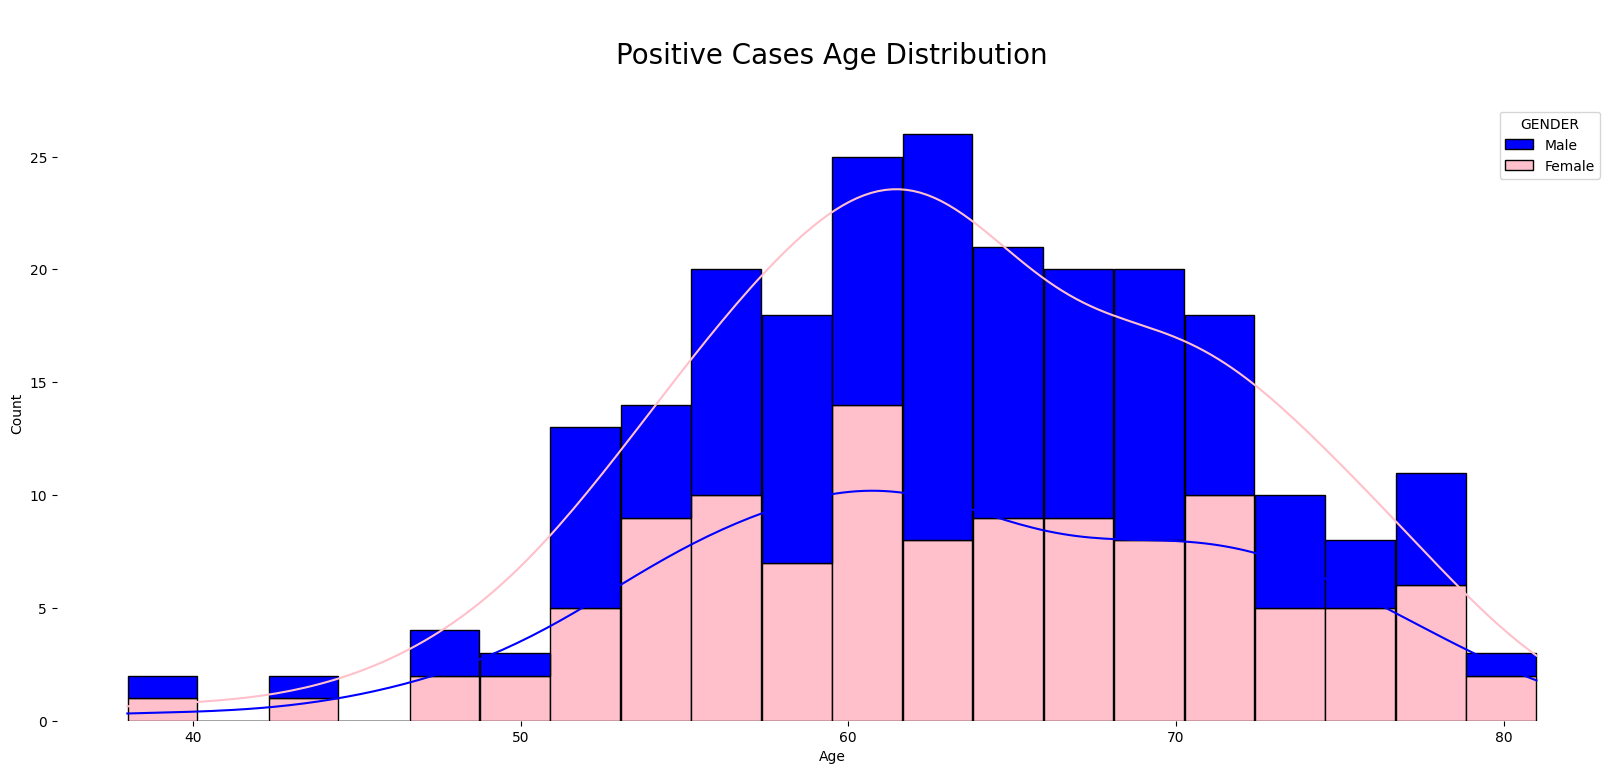

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to pink and blue
palette = ['blue', 'pink']

plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp_pos, x="AGE", hue="GENDER", multiple="stack", palette=palette, kde=True, shrink=.99, bins=20, alpha=1, fill=True)

#Manually set the line colors for the KDEs
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[1])

p.axes.set_title("\nPositive Cases Age Distribution\n", fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()


<ipython-input-36-11a4a9c0ba54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_cases['GENDER'] = positive_cases['GENDER'].map({1: 'Female', 2: 'Male'})


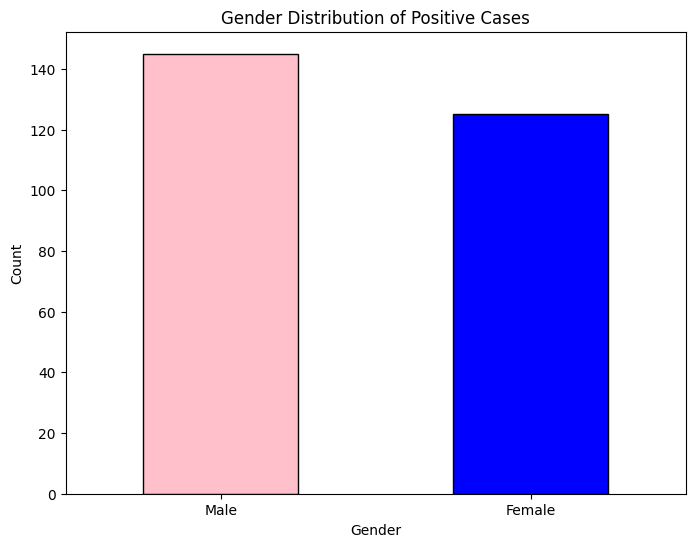

In [ ]:
positive_cases = df[df['LUNG_CANCER'] == 1]

# Map gender values for clarity
positive_cases['GENDER'] = positive_cases['GENDER'].map({1: 'Female', 2: 'Male'})

# Count positive cases by gender
gender_counts = positive_cases['GENDER'].value_counts()

# Plot gender distribution of positive cases
plt.figure(figsize=(8, 6))

if not gender_counts.empty:
    gender_counts.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')

    # Add labels and title
    plt.title('Gender Distribution of Positive Cases')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Show plot
    plt.show()
else:
    print("No positive cases found.")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the 'LUNG_CANCER' and 'GENDER' columns
label_encoder = LabelEncoder()
data["LUNG_CANCER"] = label_encoder.fit_transform(data["LUNG_CANCER"])
data["GENDER"] = label_encoder.fit_transform(data["GENDER"])

# Separate features and target variable
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Shape of training data : {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {X_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


Confusion Matrix : 

[[ 8  4]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56


The Accuracy of Logistic Regression is 92.86 %


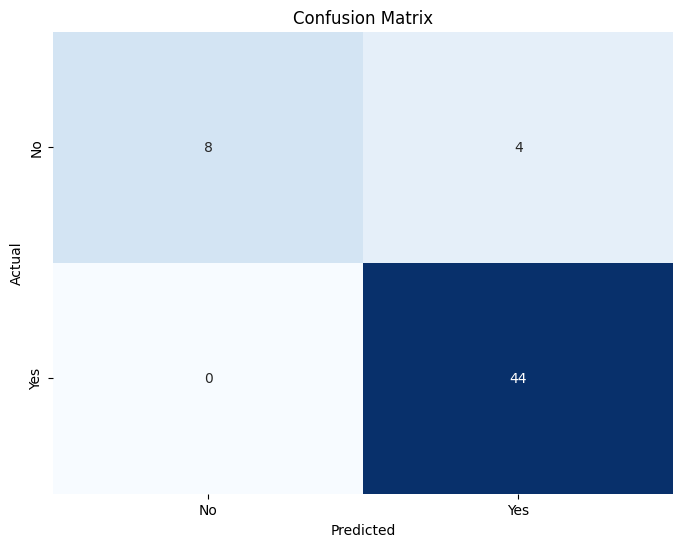

In [ ]:
# Initialize and train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
lr_conf = confusion_matrix(y_test, y_pred)
lr_report = classification_report(y_test, y_pred)
lr_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

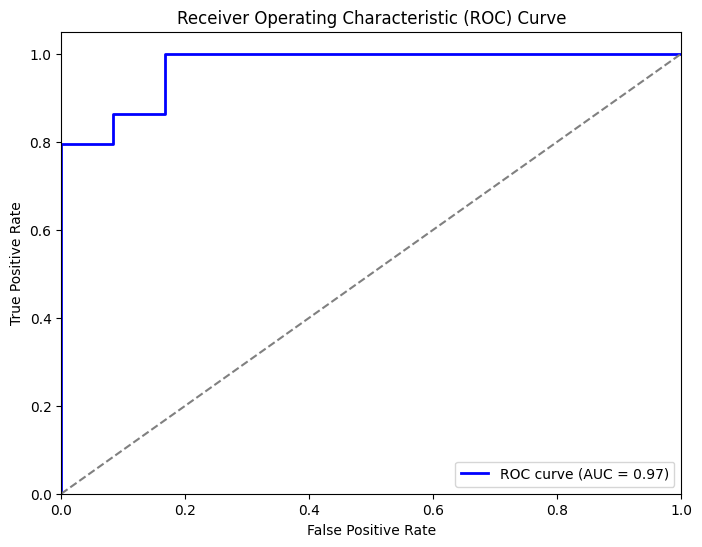

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for class 1 (positive class)
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(df.columns)


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
y = data
y.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
x = data
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

# One-hot encode the 'GENDER' column
column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ["GENDER"])
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply the transformation
X = column_transformer.fit_transform(X)

# Initialize the StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Shape of training data : {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {X_test.shape}, {y_test.shape}")


Shape of training data : (220, 16), (220,)
Shape of testing data : (56, 16), (56,)


In [ ]:
print(df.columns)


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Preprocessing for binary target variable 'LUNG_CANCER'
label_encoder = LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

# Assuming 'LUNG_CANCER' is your target column
X = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = df['LUNG_CANCER']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.05245930616703592


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains target variable
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (220, 15)
Shape of y_train: (220,)
Shape of X_test: (56, 15)
Shape of y_test: (56,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators=100, random_state=42)
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred) * 100, ndigits=2)

print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")


Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


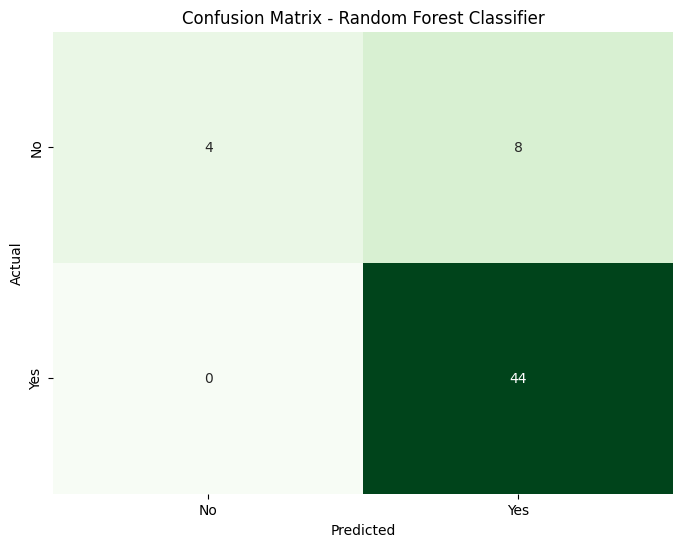

In [ ]:
# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rfg_conf, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


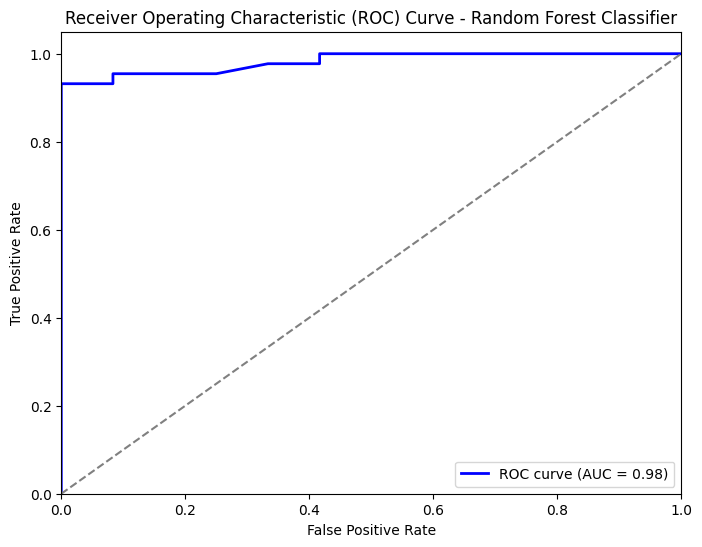

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for class 1 (positive class)
rfg_prob = rfg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr_rfg, tpr_rfg, thresholds_rfg = roc_curve(y_test, rfg_prob)
roc_auc_rfg = auc(fpr_rfg, tpr_rfg)

# Plot ROC curve for Random Forest Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfg, tpr_rfg, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rfg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
df=df.dropna(axis=1)#Drop the column with empty data
print(df.iloc[:,0].value_counts())#Visualize the data of diagnosis column with y label counts
print(df.dtypes)#Data type of data in each column


GENDER
2    162
1    147
Name: count, dtype: int64
GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object


In [ ]:
#22110

# 22010

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
df = pd.DataFrame(data)
# Print the column names
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
le=LabelEncoder()
le.fit(df['GENDER'])
df['GENDER']=le.transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
x = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]
print(df.columns)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Print the shapes of training and testing data
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K Nearest Neighbors (KNN) Results:
Confusion Matrix : 

[[12  0]
 [ 2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.98        44

    accuracy                           0.96        56
   macro avg       0.93      0.98      0.95        56
weighted avg       0.97      0.96      0.97        56


The Accuracy of K Nearest Neighbors Classifier is 96.43 %


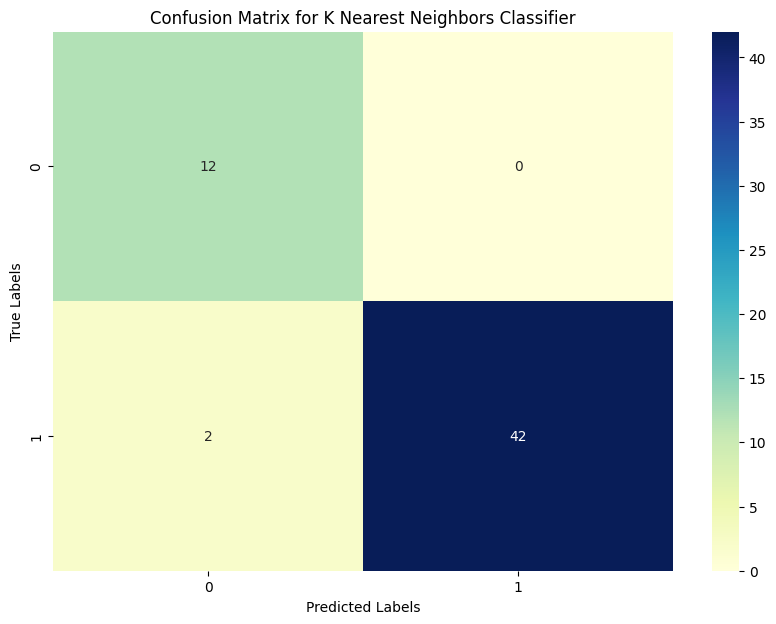

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred) * 100, 2)
print("K Nearest Neighbors (KNN) Results:")
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")
# Plotting the confusion matrix with a different color map
plt.figure(figsize=(10, 7))
sns.heatmap(knn_conf, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K Nearest Neighbors Classifier')
plt.show()


Support Vector Machine (SVM) Results:
Confusion Matrix : 

[[ 9  3]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56


The Accuracy of Support Vector Machine is 94.64 %


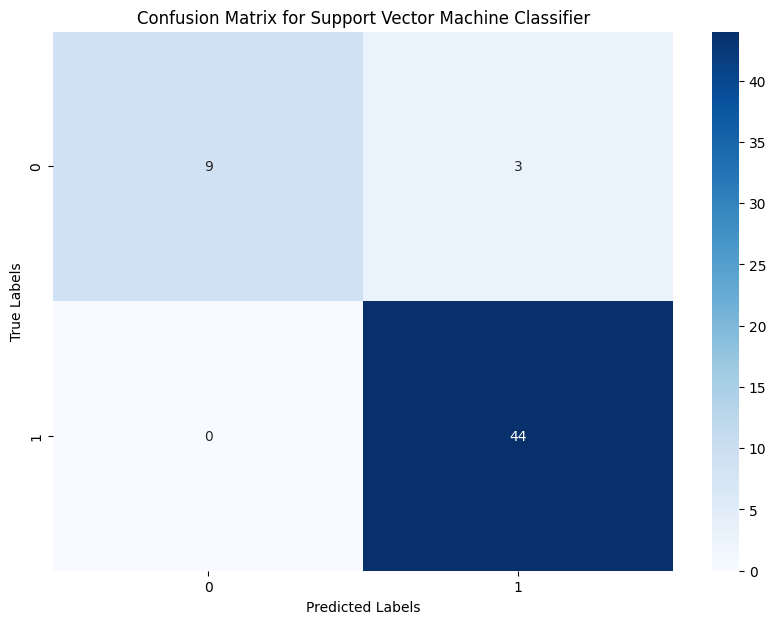

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Assuming x_train, x_test, y_train, y_test are already defined
svm = SVC(C=100, gamma=0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred) * 100, 2)
print("Support Vector Machine (SVM) Results:")
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(svm_conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


In [ ]:
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")


The Accuracy of Support Vector Machine is 94.64 %

The Accuracy of K Nearest Neighbors Classifier is 96.43 %


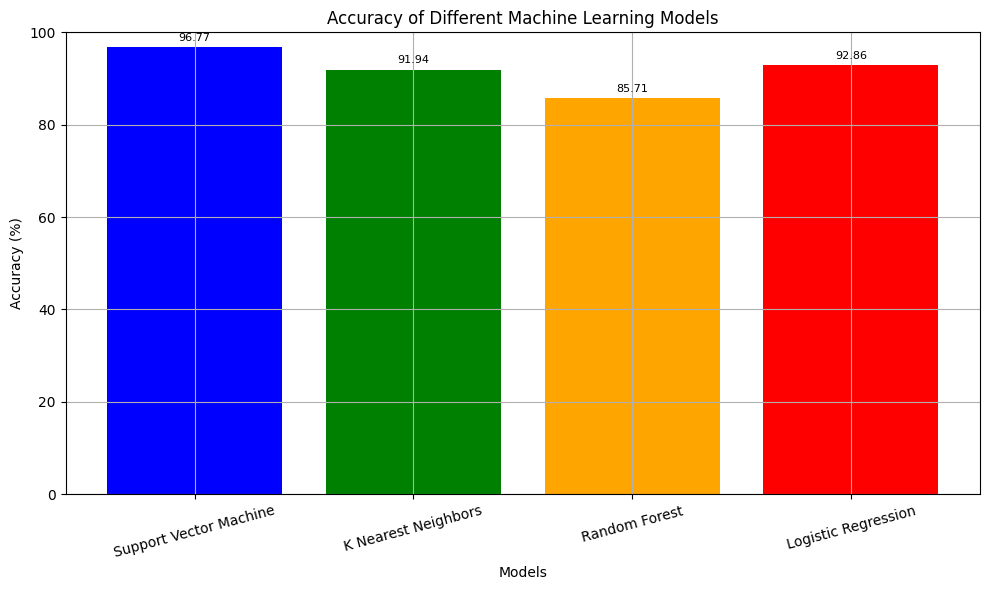

In [ ]:
import matplotlib.pyplot as plt
# Accuracy values
svm_acc = 96.77
knn_acc = 91.94
rfg_acc=85.71
accuracy_logistic = 92.86
# List of models and their accuracies
models = ['Support Vector Machine', 'K Nearest Neighbors',  'Random Forest', 'Logistic Regression']
accuracies = [svm_acc, knn_acc, rfg_acc, accuracy_logistic,]
# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Models')
plt.ylim(0, 100)  # Limit y-axis from 0 to 100 for percentage accuracy
plt.grid(True)
plt.xticks(rotation=15)  # Rotate x-axis labels for better visibility
# Adding text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
# Example if-else conditions based on accuracy values (without specific accuracy variables)
models = ['Support Vector Machine', 'K Nearest Neighbors Classifier', 'Average Accuracy (Stratified K-Fold)', 'Random Forest Classifier', 'Logistic Regression']
accuracy_values = {
    'Support Vector Machine': 96.77,
    'K Nearest Neighbors Classifier': 91.94,
    'Random Forest Classifier': 85.71,
    'Logistic Regression': 92.86,
}
max_model = max(accuracy_values, key=accuracy_values.get)

if max_model == 'Support Vector Machine':
    print("Support Vector Machine has the highest accuracy.")
elif max_model == 'K Nearest Neighbors Classifier':
    print("K Nearest Neighbors Classifier has the highest accuracy.")
elif max_model == 'Average Accuracy (Stratified K-Fold)':
    print("Average Accuracy (Stratified K-Fold) has the highest accuracy.")
elif max_model == 'Random Forest Classifier':
    print("Random Forest Classifier has the highest accuracy.")
elif max_model == 'Logistic Regression':
    print("Logistic Regression has the highest accuracy.")
else:
    print("There was an error in determining the highest accuracy.")


Support Vector Machine has the highest accuracy.
